#                           Qualifications for Data Analyst in California 

## Project Background:

   Businesses everywhere rely on data-based decisions to solve complex problems and achieve a competitive advantage. So as the students graduated from statistic major or proficient with data analysis, most parts of us are interested in looking for jobs that has the “Data analysts” positions. In order to help students get more information when they are looking for these jobs, we contribute to study the relationship of students’ job demands and the companies’ requirements. Like what are the data analysts’ required skills and what statistics characteristics they have. Our project motivation is to help students to examine whether they are qualified to be a data analyst and which skills they should cultivated to be better prepared.

## Project description:

There are many job finding websites and includes various positions of data analysts. We use the “indeed” website. For example, if the students want to apply for the positions, he can use our analysis to evaluate the success rate and the match-degree. Our project is to analyze the base requirements of the data analysts, such as what kind of soft wares, programming languages and models that the famous companies needed. And then we find every posts’ URL. According to the web scripting, we get their locations and companies information. On base of regression expression, we take the posts’ requirements data directly. And then we process and clean the data we grabbed from total requirements get the data analysts required skills and sort them. We calculate the term frequency and analyze the statistics characteristics by visualization. And then get our conclusion to guide students to get the information about what kind of jobs matched their background and technologies best and can help them evaluate the success rate of applying this position.

## Project Data:

We grabbed about the top 200 pages in the indeed website that is located in California, which is totally about 3000 posts information. And except some posts that not include the “Data Analyst”, we get the 2445 data at last.

In [156]:
import requests
import requests_cache
from bs4 import BeautifulSoup
import lxml
import re
requests_cache.install_cache('cache')

## * <span style="color:blue">Web Scrapping</span>  *

We use 3000 posts in Indeed to futher analysis. First, we get the basic information inlcluding location, company name and url for the post. For url, we locate the tags with attribute *<span style="color:blue">"data-tn-element="jobTitle"</span>*, the url is the value for attribute *<span style="color:blue">href</span>*. For location and companies' names, they are the value of tag *<span style="color:blue">span</span>* with attribute *<span style="color:blue">lccation and company </span>* seperately.

In [1]:
def get_url(start_url,pages=1):
    '''
    This function will return url,text  in the desifnated pages.
    Input: start_url: the start page
           pages:number of pages need searching.
    '''
    url=start_url 
    urls=[] #list of urls needed
    loc=[]
    names=[]
    n_next=0 #number of next url
    next_urls=[]
    while True: 
        
        html_doc=requests.get(url)
        content=html_doc.content
        soup = BeautifulSoup(content,"lxml")
        
        #urls
        tags=soup.select('a[data-tn-element="jobTitle"]') #locate
        temp_urls=[tag.get("href") for tag in tags ]
        urls=urls+["https://www.indeed.com"+url for url in temp_urls if ~url.startswith("http")]
        
        #location
        location = soup.find_all(name="span",attrs = {"class":"location"})
        loc =loc+ [i.text for i in location]
        
        #company name
        name_tags=soup.find_all(name="span",attrs = {"class":"company"})
        names=names+[i.text for i in name_tags]
        #combine
        #loc_len=len(loc)
        #url_len=len(urls)
        ###if reach the upper limitation
        if(n_next==pages-1):
            break
        ##get next pages
    
        ##if we can't find next one
        starts=(n_next+1)*10
        next_url="https://www.indeed.com/jobs?q=data+analyst&l=CA&start=%d"%(starts)
        n_next=n_next+1
        url=next_url
        next_urls=next_urls+[url]
        
        
    return urls,loc,names,next_urls
                                                     
    
    

We scarp information from corresponding website according to the url for each post. For the url, we We get job description from body of the website since all the information about the job is the value of tag *<span style="color:blue"> body</span>*.

In [3]:
def get_content(url):
    try:
        doc=requests.get(url)
        job_content=doc.content
        soup_job= BeautifulSoup(job_content,'lxml')
        job_body_tag=soup_job.find_all("body")[0]
        job={"url":url,"text":job_body_tag.text}
    except:
        job={}
    return job

We start from "https://www.indeed.com/jobs?q=data+analyst&l=CA" to find the posts related to data analysts in California. We get 3000 posts in 200 pages.

In [4]:
start_url="https://www.indeed.com/jobs?q=data+analyst&l=CA"

In [5]:
urls,locs,names,nexts=get_url(start_url,pages=200)

In [7]:
names_fn=[x.strip() for x in names]

In [185]:
import collections as cls

In [9]:
cls.Counter(names_fn)#examine names

Counter({u'21Tech': 1,
         u'360 IT Professionals': 1,
         u'39 Celsius Web Marketing': 1,
         u'A9.com': 16,
         u'AAA': 1,
         u'ABHOW': 1,
         u'AECOM': 1,
         u'AIDS Healthcare Foundation': 1,
         u'AJobStaff': 3,
         u'AKQA': 5,
         u'AMERICAN ADVISORS GROUP': 1,
         u'ARES Corporation': 1,
         u'ATR International': 1,
         u'Abacus Service Corporation': 2,
         u'Abaxis': 1,
         u'Able Forces': 1,
         u'Academic Organization': 1,
         u'Accelon Inc': 2,
         u'Accenture': 1,
         u'Accountemps': 1,
         u'Activision': 1,
         u'Acuitus': 2,
         u'Acumen LLC': 1,
         u'Ad Blot, Inc.': 1,
         u'AdRoll': 1,
         u'Adept Solutions': 3,
         u'Adobe': 4,
         u'Advancement Project': 24,
         u'Adventist Health': 2,
         u'Aetna': 1,
         u'Affinity, Inc.': 1,
         u'Agilent': 1,
         u'Alambic Investment Management, LP': 46,
         u'Alamed

In [196]:
import pandas as pd

In [11]:
job_info=[pd.DataFrame(get_content(url) for url in urls )] #get text for each post

In [12]:
job_info_fn=pd.concat(job_info)

In [13]:
job_info_fn.head()

,text,url
0,\n\n\n\n\n\n\nSAP is committed to the principl...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,"Skip to Job Description, SearchClose\n\n ...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,"Skip to Job Description, SearchClose\n\n ...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,\n\n\n\n\n\n\n\n\n\n\nCareers HomeEmployment L...,https://www.indeed.com/rc/clk?jk=84bc38d534438...
4,"Entry Level Business AnalystCalifornia City, C...",https://www.indeed.com/rc/clk?jk=4c0b2bbed6002...


In [14]:
job_info_fn['loc']=locs #add locations

In [15]:
job_info_fn['name']=names_fn #add names

After combining the information about the jobs, we get dataframe.

In [16]:
job_info_fn.head(4)

,text,url,loc,name
0,\n\n\n\n\n\n\nSAP is committed to the principl...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Francisco, CA",SAP
1,"Skip to Job Description, SearchClose\n\n ...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Francisco, CA",Sun Basket
2,"Skip to Job Description, SearchClose\n\n ...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Francisco, CA",Komodo Health
3,\n\n\n\n\n\n\n\n\n\n\nCareers HomeEmployment L...,https://www.indeed.com/rc/clk?jk=84bc38d534438...,"Sunnyvale, CA",Astreya


## * <span style="color:blue">Data Cleaning</span>  *

Our goal is to find the common required or prefered skills for data scientist in California, so we remove the posts without mentioning * <span style="color:blue">analy</span>  *. After subset, we have 2455 observations in the data.

In [187]:
requirements= job_info_fn['require']

In [188]:
idx=[(x.find("analy"))>-1 for x in requirements]

In [189]:
job_analyst=job_info_fn[idx]

In [190]:
len(job_analyst)

2455

Generally, the skills required are in the descripttions of job requirments. We first find the requirements from the job description. Sometimes, the requirements strat with key words like__* <span style="color:red">require, skill, qualification, qualify</span>  * __, we locate requirements by these words. While some posts have other rare pattern, we just keep the whole description.

In [17]:
#remove new lines
def find_require(text):
    '''
    This function find requirements.
    If key words for requirements are find, we keep the part from key words
    else return the whole description
    '''
    try:
        new=(text.strip()).replace("\n"," ")
        new_low=(new.lower()).translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
        require=re.search("(require|skill|qualification|qualify).+(apply)?",new_low)
    except:
        return ""
    if require==None:
        return new_low
    else:
        requirement=require.group(0)
    return requirement

In [18]:
job_info_fn['require']=[find_require(x) for x in job_info_fn['text']]

In [19]:
job_info_fn.head()

,text,url,loc,name,require
0,\n\n\n\n\n\n\nSAP is committed to the principl...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Francisco, CA",SAP,sap is committed to the principles of equal em...
1,"Skip to Job Description, SearchClose\n\n ...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Francisco, CA",Sun Basket,required with a strong preference for an analy...
2,"Skip to Job Description, SearchClose\n\n ...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Francisco, CA",Komodo Health,"requirementsqualificationsbs, ms, or phd in co..."
3,\n\n\n\n\n\n\n\n\n\n\nCareers HomeEmployment L...,https://www.indeed.com/rc/clk?jk=84bc38d534438...,"Sunnyvale, CA",Astreya,skills. we need sound data analysis skills and...
4,"Entry Level Business AnalystCalifornia City, C...",https://www.indeed.com/rc/clk?jk=4c0b2bbed6002...,"California City, CA",NetCloudTek,qualificationsbachlors degree. major in financ...


In [24]:
job_analyst.to_csv("data_analyst.csv", sep=',',encoding='utf-8')

In [182]:
# we export data and read it to avoid repeatedly run code
job_analyst=pd.read_csv("C:\\Users\\aran\\Documents\\stat141B\\project\\jobs_analyst.csv")

## * <span style="color:blue">Data processing</span>  *

Initially, we examine the difference of job opportunity is CA. We plot distribution of the posts on the map. We set point size according to the number of posts(jobs) in the city. The larger the size, the more employment opportunity in that city.

In [183]:
#clean for city
citys=[re.sub('(.+),.*','\\1',x) for x in job_analyst['loc']] #only keep city name

In [204]:
city_count=cls.Counter(citys)

In [206]:
city_fn=pd.DataFrame.from_dict(city_count,orient='index')

In [207]:
city_fn.columns=['counts']

In [208]:
city_fn['city']=city_fn.index

In [209]:
city_fn=city_fn.set_index([range(len(city_fn))])

In [210]:
city_fn.head()

,counts,city
0,3,Westlake Village
1,3,Newark
2,4,Loma Linda
3,672,San Francisco
4,1,Contra Costa County


Then, we set size according to the number of posts of the city.

In [211]:
def city_size(number):
    if number>600:
        return 10
    elif number>200:
        return 6
    elif number>100:
        return 5
    elif number>80:
        return 4
    elif number>50:
        return 3
    elif number>30:
        return 2
    elif number>10:
        return 1
    else:
        return 0.5
        

In [213]:
city_fn['size']=[city_size(x) for x in city_fn['counts']]

city_fn.head()

,counts,city,size
0,3,Westlake Village,0.5
1,3,Newark,0.5
2,4,Loma Linda,0.5
3,672,San Francisco,10.0
4,1,Contra Costa County,0.5


In [ ]:
#map

First, we figure out what is the min of working experience required and what will be the lowest degree

We get years of experience and degree in the requirment by regular expression. For years of experience, generally, it comes with years following. Then pattern is like __* <span style="color:red">x-x years</span>  * __ or __* <span style="color:red">x years</span>  * __. Since years mentioned in the job description are close and the one mentioned first is likely to be the minumum working exprience, we choose the first one as years of experience. When it comes for degree, we also choose the first one for the reason that the first mentioned degree will be the minumum requirement.

In [32]:
job_analyst['year']=[re.sub('(.+)([0-9]{1,2}-? *[0-9]{1,2}.*year.{0,30})(.*)','\\2',x) for x in (job_analyst['require_fn'])]

In [34]:
def get_year(text):
    '''
    This function get year from text.
    '''
    year_temp=re.match("[0-9]+",text)
    if year_temp==None:
        return 0
    else:
        return year_temp.group(0)

In [39]:
job_analyst['year']=[get_year(x) for x in job_analyst['year']]

In [41]:
max(job_analyst['year'])

8

Then, we group year as 3 groups: less than 2, 3-5 and greater than 5:

In [215]:
def year_group(year):
    '''
    This function group year accroding to the input.
    '''
    if year>5:
        return "greater than 5"
    elif year>3:
        return "3-5"
    else:
        return "less than 2"

In [217]:
job_analyst["year_group"]=[year_group(year) for year in job_analyst['year']]

Next, we find degree. The  common pattern are: __* <span style="color:red">bachelor, ms, phd, bs, master, ba</span>  * __ . We extract these pattern from the requirement.

In [127]:
job_analyst['degree']=[get_degree(x) for x in job_analyst['require_fn']]

def get_degree(text):
    '''
    This function get degree from text.
    '''
    degree_temp=re.search("bachelor|ms|phd|bs|master|ba",text)
    if degree_temp==None:
        return None
    else:
        degree_temp=degree_temp.group(0)
        if degree_temp=='bs':
            return "bachelor"
        elif degree_temp=="ms":
            return "master"
        else:
            return 'phd'

In [79]:
#process
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## * <span style="color:blue">Natural Languege Processing</span>  *

To find the common required skills, we need to find the idf for each word. Then, we select skills with small idf since the smaller the idf, the more common a certain skill is in these posts.

In [218]:
stemmer = PorterStemmer().stem

tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

### * <span style="color:blue">Caculate idf </span>  *

In [227]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
tfs = vectorizer.fit_transform(job_analyst['require'])

In [228]:
words=vectorizer.vocabulary_

In [229]:
idfs=vectorizer.idf_

In [230]:
word_df=pd.DataFrame(words.items())

In [231]:
word_df.columns=['word','pos']

In [232]:
word_df_pos=word_df.sort("pos")

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [233]:
word_df_pos['idf']=idfs

In [234]:
sorted_words=pd.DataFrame(word_df_pos.sort('idf'))#sort according to idf

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


The skills could only start with letter, so we remove the words do not start with letters

In [235]:
alpha=[x.isalpha() for x in sorted_words['word']]

We find that sometimes there is no space between two words so we add space to seperate skills.

In [237]:
job_analyst['require_fn']=[re.sub("(.+?)(sas|python|eview|spss|tableau|access|vba|matlab)(.+?)","\\1 \\2 \\3 ",x) for x in (job_analyst['require']).head()]

In [104]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
tfs = vectorizer.fit_transform(['require_fn'])

In [106]:
words=vectorizer.vocabulary_

In [107]:
idfs=vectorizer.idf_

In [108]:
word_df=pd.DataFrame(words.items())

In [109]:
word_df.columns=['word','pos']

In [110]:
word_df_pos=word_df.sort("pos")

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [111]:
word_df_pos['idf']=idfs

In [112]:
sorted_words=pd.DataFrame(word_df_pos.sort('idf'))

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [113]:
alpha=[x.isalpha() for x in sorted_words['word']]

In [114]:
words_alpha=sorted_words[alpha]

In [178]:
words_alpha.to_csv("words_alpha.csv", sep=',',encoding='utf-8')

In [13]:
words_alpha=pd.read_csv("words_alpha.csv")

We find that the common ones are: __* <span style="color:red">r,spss, excel, sql, python,java, hadoop, pig, spark, hive, orac, vba, mysql, sqlserver, matlab, microsoft,access,matlab,stata,sa,tableau</span>  * __ . We use regular expression to see whether a post mentioned specific software.


In [14]:
#select softwares
soft_idx=[re.match('^(r|spss|excel|sql|python|java|hadoop|pig|spark|hive|oracl|vba|mysql|\
sqlserver|microsoft|access|matlab|stata|sa|tableau)$',x) for x in words_alpha['word']]


In [15]:
soft_idx1=[not x==None for x in soft_idx]

In [16]:
software=words_alpha[soft_idx1]

In [17]:
software=software[['word','idf']]#show common idf 

In [18]:
software 

,word,idf
26,r,1.395435
41,sql,1.517182
50,excel,1.577928
80,access,1.708237
227,python,2.103231
266,java,2.289728
486,hadoop,2.937878
504,tableau,2.982875
529,matlab,3.038804
533,spark,3.047693


We match these software directly by their name expect r, sas, excel, java and sql. 

In [122]:
soft_pattern=software['word'][(software['word']!='r')& (software['word']!='sa')& (software['word']!='sql')& (software['word']!='excel')]

In [123]:
soft_pattern

80         access
227        python
266          java
486        hadoop
504       tableau
529        matlab
533         spark
630     microsoft
925         oracl
1199          vba
1718         hive
2204         spss
2375        mysql
2659          pig
2877        stata
5085    sqlserver
Name: word, dtype: object

In [128]:
job_analyst.to_csv("job_analyst_mar10.csv")

In [11]:
job_analyst=pd.read_csv("job_analyst_mar10.csv")

In [86]:
soft_mention=[[re.search(x,y) for y in job_analyst['require_fn']] for x in soft_pattern] #match ohter patterns 

soft_mention=(pd.DataFrame(soft_mention)).T #transpose

In [88]:
soft_mention.columns=soft_pattern

We match "r","excel" and "java" with pattern " r ", "excel " and " java" since what we are looking for is the software. If we just match these words, we could possibly match a part in a word like "experience", "excellent" and "javascript" which does not be included in job description. 

In [89]:
soft_mention['r']=[re.search(" r ",x) for x in job_analyst['require_fn']]
soft_mention['excel']=[re.search(" excel",x) for x in job_analyst['require_fn']]
soft_mention['java']=[re.search(" java ",x) for x in job_analyst['require_fn']]

We match "sas" with pattern "sas" since in the process __* <span style="color:red">lemmatize</span>  * __, we remove 'ending s' from 'sas. If we just match "sa", we could get wrong word like 'salary'.

In [90]:
soft_mention['sas']=[re.search("sas",x) for x in job_analyst['require_fn']]

For "sql", if we match directly by "sql", we will repeatedly count "mysql" and "sqlsever" which also contain "sql" so we match " sql".

In [134]:
soft_mention['sql']=[re.search(" sql",x) for x in job_analyst['require_fn']]

Show the whole dataframe.

In [142]:
soft_mention=pd.DataFrame(soft_mention)

In [143]:
soft_mention=soft_mention.set_index([range(len(soft_mention))])

In [238]:
soft_mention.head()

word,sql,excel,access,python,java,hadoop,tableau,matlab,spark,microsoft,oracl,vba,hive,spss,mysql,pig,stata,sqlserver,r,sas
0,<_sre.SRE_Match object at 0x0000000011235370>,<_sre.SRE_Match object at 0x0000000011DA18B8>,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,<_sre.SRE_Match object at 0x0000000011B23B28>,None
1,None,None,<_sre.SRE_Match object at 0x00000000120A5370>,<_sre.SRE_Match object at 0x0000000011623098>,<_sre.SRE_Match object at 0x00000000117B8AC0>,<_sre.SRE_Match object at 0x00000000113BE370>,None,<_sre.SRE_Match object at 0x00000000113D65E0>,<_sre.SRE_Match object at 0x00000000113E7780>,None,None,None,None,None,None,None,None,None,<_sre.SRE_Match object at 0x000000001192F7E8>,None
2,<_sre.SRE_Match object at 0x0000000011235308>,<_sre.SRE_Match object at 0x0000000011DA1850>,None,None,None,None,<_sre.SRE_Match object at 0x00000000113D2370>,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,<_sre.SRE_Match object at 0x00000000112353D8>,None,None,<_sre.SRE_Match object at 0x0000000011623100>,None,<_sre.SRE_Match object at 0x00000000113BE3D8>,<_sre.SRE_Match object at 0x00000000113D23D8>,None,<_sre.SRE_Match object at 0x00000000113E77E8>,None,None,None,None,None,None,None,None,None,None,None


### * <span style="color:blue">Caculate Frequency</span>  *

In this progress, we count frequency for these skills.

First, we conver result for search into binary variable. If match, we set 1 otherwise set 0.

In [112]:
#count for total
def binary_change(result):
    '''This function will change the result for match into 0-1.
    If none y=0 and vice versa.
    '''
    if result==None:
        return 0
    else:
        return 1

In [145]:
binary_list=soft_mention.applymap(binary_change)

In [146]:
binary_list.head()

word,sql,excel,access,python,java,hadoop,tableau,matlab,spark,microsoft,oracl,vba,hive,spss,mysql,pig,stata,sqlserver,r,sas
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


Then, we calculate frequency for each skill which is the column sum. 

In [147]:
counts_whole=binary_list.apply(np.sum, axis=0)#count for all

In [148]:
counts_whole=pd.DataFrame(counts_whole)

In [151]:
counts_whole.columns=['counts']

In [153]:
counts_whole.sort('counts',ascending=False) #sorting 

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,counts
word,
r,1391
excel,1210
sql,1067
access,981
python,750
tableau,310
hadoop,304
spark,261
microsoft,259


In [155]:
counts_whole.to_csv("counts_all.csv")

In [11]:
count_texts = ['counts_words_new.csv']
all_texts = dict()
for text in count_texts:
    with open('/Users/seasonli/Desktop/141b final pro/0314/'+text,'r') as f:
        data = f.read()
        all_texts[text] = data

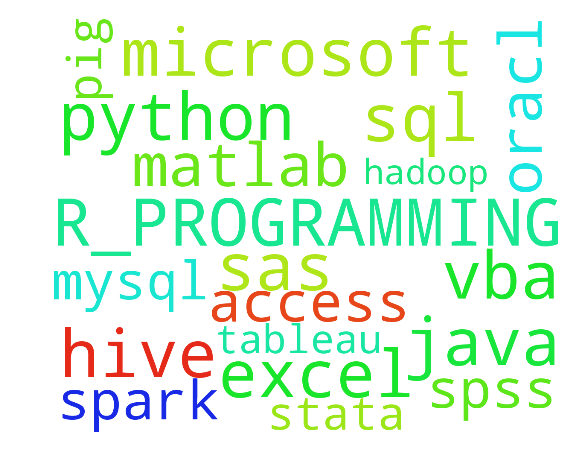

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000).generate(all_texts['counts_words_new.csv'])




plt.imshow(wordcloud)
plt.axis('off')   ## used to generate out axis of picture
plt.show()

## Word Graph Analysis:

This graph shows the term frequency that corresponding to “Data Analyst” posts required skills. In the word frequency graph, the size of the word stand for the appeared frequency of each skill. The bigger size showed, the more the skill is required. As intuitively showed in the graph, the most required skill is “R_PROGRAMMING”, which is also called “r”. And then the second most required skill is “excel”. And the next most required skill are “sql”, “access”. And then “python” is also used in a wide range. While the “tableau”,”hadoop”, “spark”, “microsoft”, “java”, “matlab”, “sas”, “oracl” are not used as often as the other skills we mentioned above. In the end, “stata”, “vba”, “hive”, ”spss”, “mysql”, ”pig”, “sqlserver” are required less, in some word, they are almost not required except some special cases. This is corresponding to our conclusion in the bar plots at first, while this graph is more intuitive.

In [ ]:
##total

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

whole_counts=pd.read_csv("counts_all.csv")
whole_counts

,word,counts
0,sql,1067
1,excel,1210
2,access,981
3,python,750
4,java,236
5,hadoop,304
6,tableau,310
7,matlab,232
8,spark,261
9,microsoft,259


/Users/seasonli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


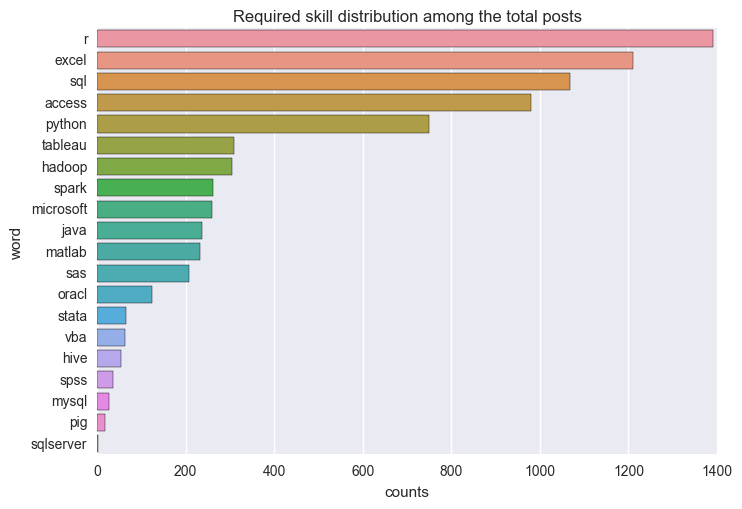

In [2]:
whole_counts = whole_counts.sort("counts", ascending = False)
ax = sns.barplot( x="counts", y="word",data=whole_counts)
ax.set(xlabel="counts",ylabel="word")
plt.title('Required skill distribution among the total posts')
plt.show()

## Total Skill Distribution Analysis:

This graph shows the required skill distribution among the total posts. In the graph, the horizontal axis stands for the “counts”, which means the total number of every skill needed in the total 2445 “Data Analyst” posts. On the other hand, the vertical axis means the skills’ name that is required among the total posts. As the different skill distributed in the graph, we can find that the most used skill is “r”, and then the second most required skill is “excel”. And the next most required skill are “sql”, “access”. And then “python” is also used in a wide range. While the “tableau”,”hadoop”, “spark”, “microsoft”, “java”, “matlab”, “sas”, “oracl” are not used as often as the other skills we mentioned above. In the end, “stata”, “vba”, “hive”, ”spss”, “mysql”, ”pig”, “sqlserver” are required less, in some word, they are almost not required except some special cases. These are the total “Data Analyst”posts’ required skills.

In [168]:
binary_list['degree']=job_analyst['degree']#add degree

binary_list['year_group']=job_analyst['year_group']#add experience

In [169]:
binary_list.head()

word,sql,excel,access,python,java,hadoop,tableau,matlab,spark,microsoft,...,hive,spss,mysql,pig,stata,sqlserver,r,sas,degree,year_group
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,phd,less than 2
1,0,0,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,1,0,bachelor,less than 2
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,master,less than 2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,phd,less than 2
4,1,0,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,phd,3-5


In [162]:
binary_list.to_csv("binary_list.csv")

Then, we get frequenct according to experience and degree.

In [174]:
#group by degree
by_degree=binary_list.iloc[:,0:21].groupby("degree")

In [176]:
skill_degree=by_degree.sum() #skill for degree

In [ ]:
##Bachelor degree

In [3]:
skill_degrees=pd.read_csv("skill_degree.csv")
skill_degrees

,degree,sql,excel,access,python,java,hadoop,tableau,matlab,spark,...,oracl,vba,hive,spss,mysql,pig,stata,sqlserver,r,sas
0,bachelor,66,107,297,221,207,218,18,204,204,...,26,4,9,8,1,8,2,0,350,39
1,master,519,527,513,371,14,25,165,13,16,...,37,10,15,9,18,4,54,0,506,46
2,phd,482,576,171,158,15,61,127,15,41,...,61,50,29,19,8,7,10,3,535,122


In [4]:
bachelor=pd.DataFrame(skill_degrees.iloc[2,1:])
bachelor['word']=bachelor.index
bachelor

,2,word
sql,482,sql
excel,576,excel
access,171,access
python,158,python
java,15,java
hadoop,61,hadoop
tableau,127,tableau
matlab,15,matlab
spark,41,spark
microsoft,115,microsoft


/Users/seasonli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


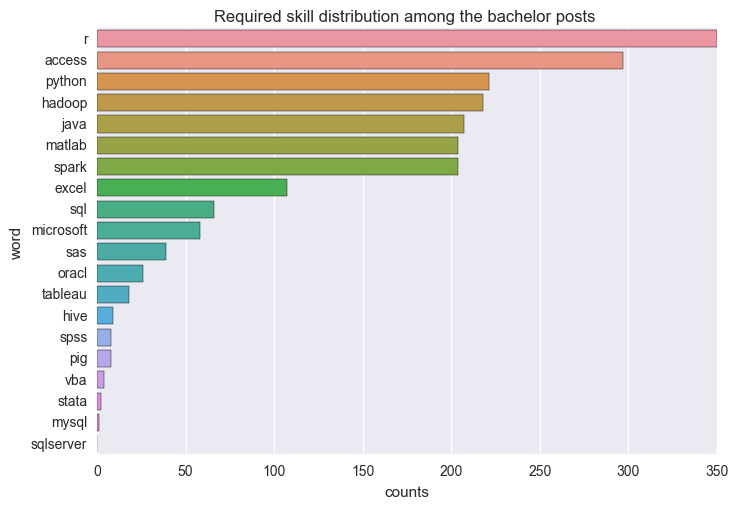

In [5]:
bachelor=pd.DataFrame(skill_degrees.iloc[0,1:])
bachelor['word']=bachelor.index
bachelor

bachelor=pd.DataFrame(skill_degrees.iloc[0,1:])
bachelor['word']=bachelor.index
bachelor.columns=['counts','word']
bachelor

bachelor = bachelor.sort("counts", ascending = False)
ax = sns.barplot( x="counts", y="word",data=bachelor)
ax.set(xlabel="counts",ylabel="word")
plt.title('Required skill distribution among the bachelor posts ')
plt.show()

## Bachelor Degree Skill Distribution Analysis:

This graph shows the “Data Analyst” required skills distribution among the bachelor degree. In the graph, the horizontal axis stands for the “counts”, which means the total number of every skill needed in the bachelor level “Data Analyst” posts. On the other hand, the vertical axis means the skills’ name that is required among the total posts. As directly showed in the graph, we can find that the most used skill is “excel”, and then the second most required skill is “r”. And the next most required skills are “sql”, “access”. And then “python” is also used in a wide range. While the “tableau”,”hadoop”, “spark”, “microsoft”, “java”, “matlab”, “sas”, “oracl” are not used as often as the other skills we mentioned above. In the end, “stata”, “vba”, “hive”, ”spss”, “mysql”, ”pig”, “sqlserver” are required less, in some word, they are almost not required except some special cases. There are not too many differences between the bachelor degree and total statistics. The biggest difference is that the most required skill is “r”, which is obvious more than other skills. But “excel” is not required as more as other degree required. This may because of the undergraduate students can arrive at the proficient “r” level.

In [ ]:
##Master degree

In [6]:
master=pd.DataFrame(skill_degrees.iloc[1,1:])
master['word']=master.index
master

,1,word
sql,519,sql
excel,527,excel
access,513,access
python,371,python
java,14,java
hadoop,25,hadoop
tableau,165,tableau
matlab,13,matlab
spark,16,spark
microsoft,86,microsoft


In [7]:
master=pd.DataFrame(skill_degrees.iloc[1,1:])
master['word']=master.index
master.columns=['counts','word']
master

,counts,word
sql,519,sql
excel,527,excel
access,513,access
python,371,python
java,14,java
hadoop,25,hadoop
tableau,165,tableau
matlab,13,matlab
spark,16,spark
microsoft,86,microsoft


/Users/seasonli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


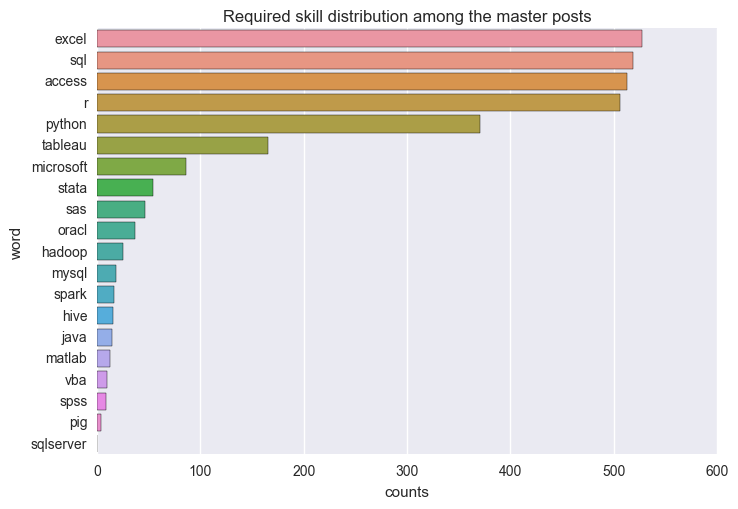

In [8]:
master = master.sort("counts", ascending = False)
ax = sns.barplot( x="counts", y="word",data=master)
ax.set(xlabel="counts",ylabel="word")
plt.title('Required skill distribution among the master posts')
plt.show()

## Master Degree Skill Distribution Analysis:

This graph shows the “Data Analyst” required skills distribution among the master degree. In the graph, the horizontal axis stands for the “counts”, which means the total number of every skill needed in the master level “Data Analyst” posts. On the other hand, the vertical axis means the skills’ name that is required among the total posts. As directly showed in the graph, we can find that the most used skill is also “excel”, and then the second most required skill is “sql”. And the next most required skill are “r”, “access”. And then “python” is also used in a wide range. While the “tableau”,”hadoop”, “spark”, “microsoft”, “java”, “matlab”, “sas”, “oracl” are not used as often as the other skills we mentioned above. In the end, “stata”, “vba”, “hive”, ”spss”, “mysql”, ”pig”, “sqlserver” are required less, in some word, they are almost not required except some special cases. There are not too many differences between the master degree and total statistics. The most big difference is that the most required skill becomes into “excel” rather than “r”, this may because of the master level students acquire more kinds of skills not only be limited into “r” programming language.

In [ ]:
##Phd degree

/Users/seasonli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


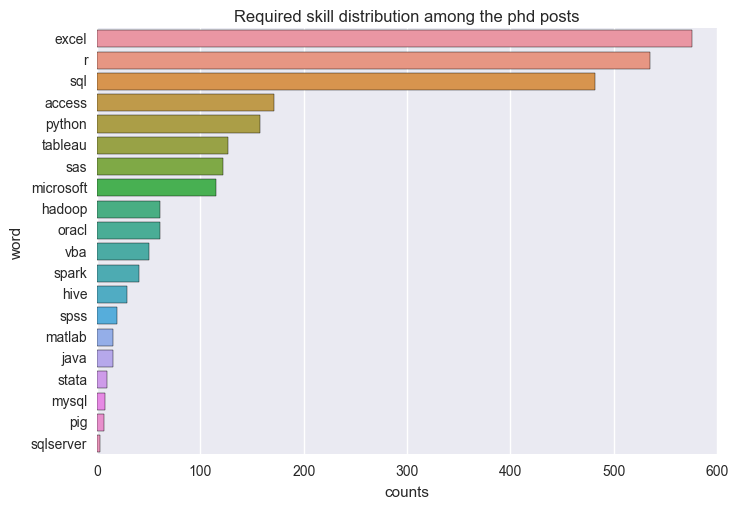

In [9]:
phd=pd.DataFrame(skill_degrees.iloc[2,1:])
phd['word']=phd.index
phd

phd=pd.DataFrame(skill_degrees.iloc[2,1:])
phd['word']=phd.index
phd.columns=['counts','word']
phd

phd = phd.sort("counts", ascending = False)
ax = sns.barplot( x="counts", y="word",data=phd)
ax.set(xlabel="counts",ylabel="word")
plt.title('Required skill distribution among the phd posts')
plt.show()

## Phd Degree Skill Distribution Analysis:

This graph shows the “Data Analyst” required skills distribution among the phd degree. In the graph, the horizontal axis stands for the “counts”, which means the total number of every skill needed in the phd level “Data Analyst” posts. On the other hand, the vertical axis means the skills’ name that is required among the total posts. As directly showed in the graph, we can find that the most used skill is also “excel”, and then the second most required skill is “r”. And the next most required skill are “sql”, “access”. And then “python” is also used in a wide range. While the “tableau”,”hadoop”, “spark”, “microsoft”, “java”, “matlab”, “sas”, “oracl” are not used as often as the other skills we mentioned above. In the end, “stata”, “vba”, “hive”, ”spss”, “mysql”, ”pig”, “sqlserver” are required less, in some word, they are almost not required except some special cases. There are not too many differences between the phd degree and total statistics. The most big difference is that the most required skill becomes into “excel” rather than “r”, but “r” also has a high frequency among these required skills. This may because of the “Data Analyst ” posts that is suitable for the phd students are more target to the “excel” and “r”, which can give the phd students a hint that “excel” and “r” play an important role in the “Data Analyst” posts.

In [177]:
skill_degree.to_csv("skill_degree.csv")

In [179]:
#group by experience
skill_exp=(binary_list.drop('degree',axis=1).groupby('year_group')).sum()

In [180]:
skill_exp

word,sql,excel,access,python,java,hadoop,tableau,matlab,spark,microsoft,oracl,vba,hive,spss,mysql,pig,stata,sqlserver,r,sas
year_group,,,,,,,,,,,,,,,,,,,,
3-5,45,80,31,14,7,7,21,2,3,25,6,9,2,2,3,1,1,0,101,19
greater than 5,14,18,17,7,4,1,7,0,2,11,4,5,1,0,1,0,0,0,18,7
less than 2,1008,1112,933,729,225,296,282,230,256,223,114,50,50,34,23,18,65,3,1272,181


In [181]:
skill_exp.to_csv('skill_exp.csv')